In [1]:
import platform
import tensorflow
import keras
print("Platform: {}".format(platform.platform()))
print("Tensorflow version: {}".format(tensorflow.__version__))
print("Keras version: {}".format(keras.__version__))

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from IPython.display import Image

/home/alex/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Platform: Linux-4.15.0-45-generic-x86_64-with-debian-buster-sid
Tensorflow version: 1.9.0
Keras version: 2.2.4


In [2]:
### Keras序列模型

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(2,input_shape=(1,)))
model.add(Dense(1))

In [3]:
### define input

from keras.layers import Input
mnist_input = Input(shape=(784,))

### connect different layers
from keras.layers import Dense
mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)


In [5]:
from keras.models import Model

mnist_input = Input(shape=(784,))
hidden = Dense(512)(mnist_input)
model = Model(inputs=mnist_input,output=hidden)

/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """


### exercise

#### mlp


讓我們來定義了一個多類別分類(multi-class classification)的多層感知器(MLP)模型。

該模型有784個輸入，3個隱藏層，512,216和128個隱藏神經元，輸出層有10個輸出。

在每個隱藏層中使用relu激活函數，並且在輸出層中使用softmax激活函數進行多類別分類。



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 784)               0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               401920    
_________________________________________________________________
hidden2 (Dense)              (None, 216)               110808    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               27776     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 541,794
Trainable params: 541,794
Non-trainable params: 0
_________________________________________________________________


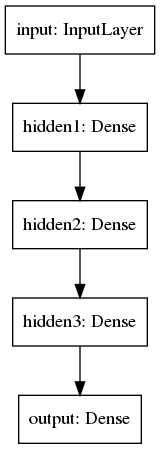

In [9]:
from keras.utils import plot_model

inputLayer = Input(shape=(784,),name='input')
hidden1 = Dense(512,activation='relu',name='hidden1')(inputLayer)
hidden2 = Dense(216,activation='relu',name='hidden2')(hidden1)
hidden3 = Dense(128,activation='relu',name='hidden3')(hidden2)
output = Dense(10,activation = 'sigmoid',name='output')(hidden3)

model = Model(inputs=inputLayer,outputs = output)

model.summary()

plot_model(model,to_file='mlp.png')
Image('mlp.png')

### CNN


該模型接收灰階的28×28圖像作為輸入，然後有一個作為特徵提取器的兩個卷積和池化層的序列， 然後是一個完全連接層來解釋特徵，並且具有用於10類預測的softmax激活的輸出層。

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 128)       2176      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 64)          131136    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 4, 4, 64)          0         
_________________________________________________________________
hidden1 (Dense)              (None, 4, 4, 64)          4160      
_________________________________________________________________
output1 (Dense)              (None, 4, 4, 10)          650       
Total para

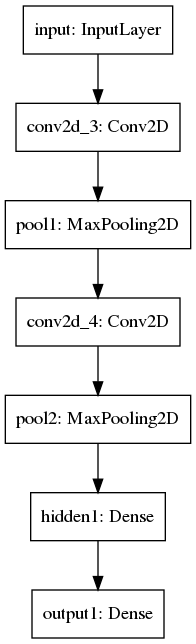

In [12]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.utils import plot_model


mnist_input = Input(shape=(28,28,1),name='input')
conv1 = Conv2D(128,kernel_size=4,activation='relu')(mnist_input)
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)


conv2 = Conv2D(64,kernel_size=4,activation='relu')(pool1)
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)

hidden1 = Dense(64,activation = 'relu',name='hidden1')(pool2)
output = Dense(10,activation='softmax',name='output1')(hidden1)
model = Model(inputs=mnist_input,outputs=output)

model.summary()



plot_model(model,to_file='mlp.png')
Image('mlp.png')



### RNN



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 784, 1)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 84,362
Trainable params: 84,362
Non-trainable params: 0
_________________________________________________________________


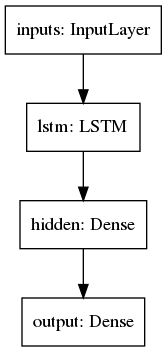

In [15]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.utils import plot_model


inputs = Input(shape=(784,1),name='inputs')
lstm1 = LSTM(128,name='lstm')(inputs)
hidden1 = Dense(128,activation='relu',name='hidden')(lstm1)
output = Dense(10,activation='softmax',name='output')(hidden1)
model = Model(inputs=inputs,outputs = output)

model.summary()



plot_model(model,to_file='mlp.png')
Image('mlp.png')


### 共享层模型

多个神经层可以共享一个神经层的输出来当做输入



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 25, 25, 32)   544         input[0][0]                      
__________________________________________________________________________________________________
pool1 (MaxPooling2D)            (None, 12, 12, 32)   0           conv1[0][0]                      
__________________________________________________________________________________________________
pool2 (Max

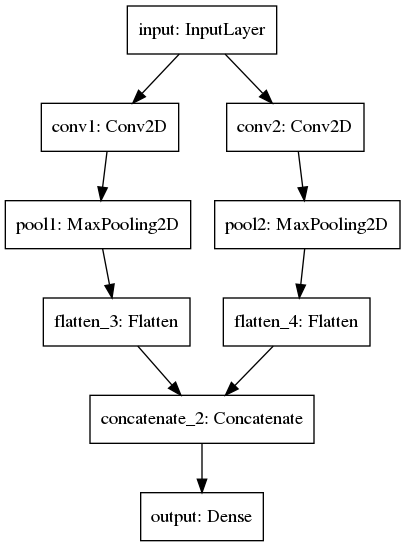

In [18]:
from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model


inputs = Input(shape=(28,28,1),name='input')

#特征提取层1

conv1 = Conv2D(32,kernel_size=(4,4),activation='relu',name='conv1')(inputs)
pool1 = MaxPool2D(pool_size=(2,2),name='pool1')(conv1)
flat1 = Flatten()(pool1)

#特征提取层2

conv2 = Conv2D(32,kernel_size=(4,4),activation='relu',name='conv2')(inputs)
pool2 = MaxPool2D(pool_size=(2,2),name='pool2')(conv2)
flat2 = Flatten()(pool2)

merge = concatenate([flat1,flat2])

output = Dense(10,activation='sigmoid',name='output')(merge)

model = Model(inputs=inputs,outputs=output)


model.summary()



plot_model(model,to_file='mlp.png')
Image('mlp.png')


/home/alex/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ou...)`


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 784, 1)       0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     (None, 128)          66560       input[0][0]                      
__________________________________________________________________________________________________
interp21 (Dense)                (None, 64)           8256        lstm[0][0]                       
__________________________________________________________________________________________________
interp22 (Dense)                (None, 32)           2080        interp21[0][0]                   
__________________________________________________________________________________________________
interp1 (D

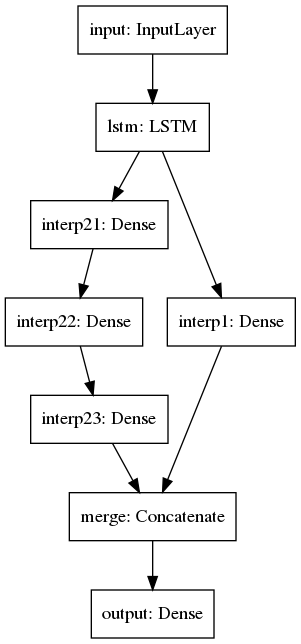

In [19]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.merge import concatenate
from keras.utils import plot_model



inputs = Input(shape=(784,1),name='input')

lstm1 = LSTM(128,name='lstm')(inputs)

interp1 = Dense(10,activation='relu',name='interp1')(lstm1)

interp21 = Dense(64,activation='relu',name='interp21')(lstm1)
interp22 = Dense(32,activation='relu',name='interp22')(interp21)
interp23 = Dense(16,activation='relu',name='interp23')(interp22)


merge = concatenate([interp1,interp23],name='merge')

output = Dense(10,activation='sigmoid',name='output')(merge)
model  = Model(inputs=inputs,output=output)


model.summary()



plot_model(model,to_file='mlp.png')
Image('mlp.png')



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs1 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
inputs2 (InputLayer)            (None, 64, 64, 1)    0                                            
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 61, 61, 32)   544         inputs1[0][0]                    
__________________________________________________________________________________________________
conv21 (Conv2D)                 (None, 61, 61, 32)   544         inputs2[0][0]                    
__________________________________________________________________________________________________
pool11 (Ma

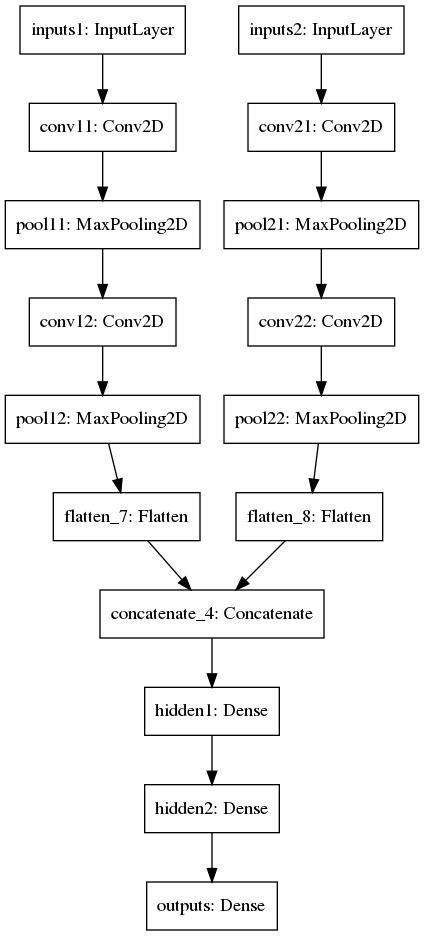

In [23]:
### 多输入模型

#我們將開發一個圖像分類模型，將圖像的兩個版本作為輸入，每個圖像的大小不同。特別是一個灰階的64×64版本和一個32×32的彩色版本。
#分離的特徵提取CNN模型對每個模型進行操作，然後將兩個模型的結果連接起來進行解釋和最終預測。


from keras.models import Model
from keras.layers import Input, Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.merge import concatenate
from keras.utils import plot_model


inputs1 = Input(shape=(64,64,1),name='inputs1')
conv11 = Conv2D(32,kernel_size=4,name='conv11')(inputs1)
pool11 = MaxPool2D(pool_size=(2,2),name='pool11')(conv11)
conv12 = Conv2D(16,kernel_size=4,name='conv12')(pool11)
pool12 = MaxPool2D(pool_size=(2,2),name='pool12')(conv12)
flat1 = Flatten()(pool12)


inputs2 = Input(shape=(64,64,1),name='inputs2')
conv21 = Conv2D(32,kernel_size=4,name='conv21')(inputs2)
pool21 = MaxPool2D(pool_size=(2,2),name='pool21')(conv21)
conv22 = Conv2D(16,kernel_size=4,name='conv22')(pool21)
pool22 = MaxPool2D(pool_size=(2,2),name='pool22')(conv22)
flat2 = Flatten()(pool22)


merge = concatenate([flat1,flat2])
#use hidden layer to interpret the data
hidden1 = Dense(128,activation='relu',name='hidden1')(merge)
hidden2 = Dense(64,activation='relu',name='hidden2')(hidden1)
outputs = Dense(10,activation='sigmoid',name='outputs')(hidden2)


model = Model(inputs = [inputs1,inputs2],outputs = outputs)

model.summary()



plot_model(model,to_file='mlp.png')
Image('mlp.png')




### 多输出模型


In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import LSTM
from keras.layers.wrappers import TimeDistributed
from keras.utils import plot_model


inputs = Input(shape=(784,1),name='inputs')
extract = LSTM(64,return_sequences=True,name='extract')(inputs)

class11 = LSTM(32,name='LSTM')(extract)
class12 = Dense(32,activation='relu')(class11)
output1 = Dense(10lname='output1',activation='softmax')(class12)

output2 = TimeDistributed(Dense(10,activation='softmax'),name='output2')(extract)

model = Model(inputs=  inputs,outputs)